In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a decision tree classifier to classify the given data and visualize it graphically.

In [156]:
data = pd.read_csv(r'C:\Users\stali\OneDrive\Desktop\SPARK INTERNSHIP\Decision tree classifier\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [158]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [159]:
#The info() method in pandas provides a concise summary of a DataFrame, displaying the data types, non-null counts, and memory usage of each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [160]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [161]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [162]:
#The isnull() method in pandas is used to identify missing values in a DataFrame, and sum() is then applied to count the number of null values in each column. The result is a Series showing the count of null values for each column in the DataFrame named data.

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [163]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [164]:
data.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [165]:
#This code selects numeric columns from the DataFrame named data using select_dtypes, calculates the correlation matrix for these numeric columns using corr(), and then prints the resulting correlation matrix. It helps analyze the linear relationships between different numeric variables in the dataset.

numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<Axes: >

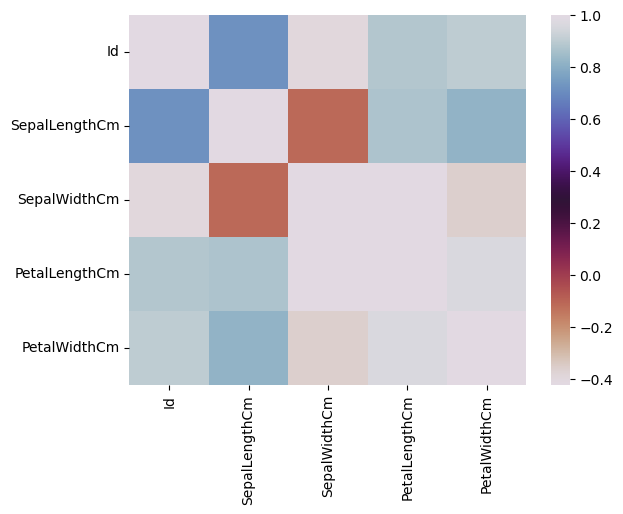

In [166]:
#This code uses the seaborn library to create a heatmap visualization of the correlation matrix (correlation_matrix). The chosen color map (twilight_r) is applied to represent the strength and direction of correlations between numeric variables in the dataset. Heatmaps are useful for visualizing patterns and relationships in large datasets.
sns.heatmap(correlation_matrix, cmap = "twilight_r")

<Axes: >

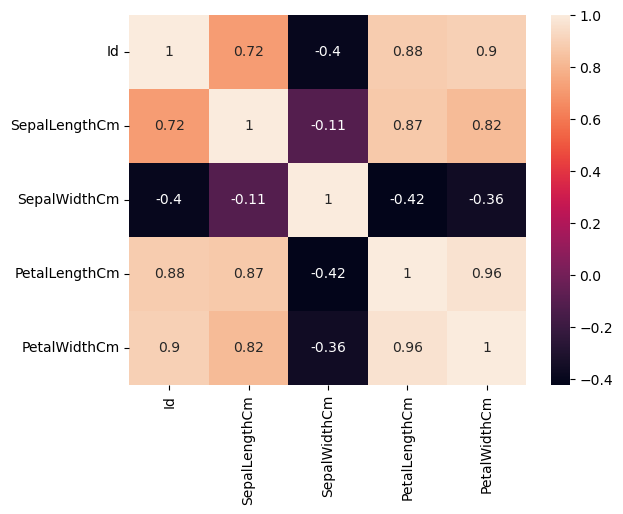

In [167]:
#This code generates a heatmap using seaborn with annotations (annot=True), displaying the numeric values of the correlation coefficients within the cells of the heatmap. This is useful for a more detailed examination of the correlation matrix, providing specific correlation values between pairs of variables.
sns.heatmap(correlation_matrix, annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


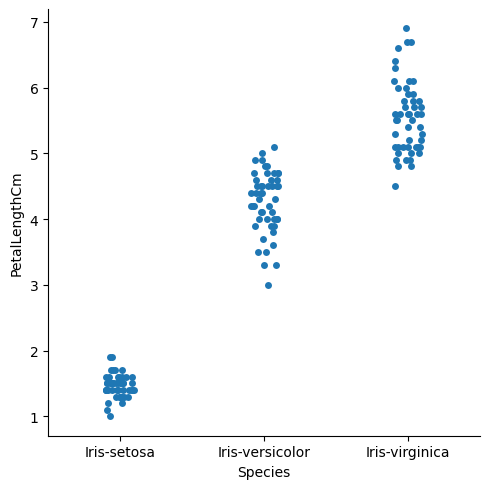

In [168]:
#This code creates a categorical plot using seaborn (catplot). It visualizes the relationship between the categorical variable 'Species' on the x-axis and the numeric variable 'PetalLengthCm' on the y-axis in the DataFrame 'data'. The plot type is chosen automatically based on the data distribution.
sns.catplot(x='Species', y='PetalLengthCm', data=data)

In [169]:
#This code is extracting the feature variables (independent variables) from the DataFrame 'data'. It selects columns at index positions 1 through 4 (exclusive) and assigns them to the variable 'x'. Additionally, it extracts the target variable (dependent variable) from the last column and assigns it to the variable 'y'.
x = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,-1].values

In [170]:
#This code is using the OneHotEncoder from scikit-learn to perform one-hot encoding on the 'Species' column of the DataFrame 'data'. The resulting one-hot encoded matrix is stored in the variable 'y_new', and the sparse parameter is set to False, indicating that the output should be in dense format.
from sklearn.preprocessing import OneHotEncoder
oho = OneHotEncoder(sparse = False)
y_new = oho.fit_transform(data[['Species']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [171]:
y_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [172]:
df = pd.DataFrame(y_new)
df.rename(columns={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}, inplace=True)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [173]:
result = pd.concat([data,df] ,axis = 1)
result.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [175]:
new_x = result.iloc[:,[1,2,3,4]].values
new_y = result.iloc[:,[5,6,7]].values

In [176]:
#This code is using scikit-learn's train_test_split function to split the dataset into training and testing sets. It takes new_x as the feature matrix, new_y as the target variable, sets the test size to 30% of the data (test_size=0.3), and uses a random seed of 1 for reproducibility (random_state=1). The resulting sets are train_x, test_x, train_y, and test_y.
train_x,test_x,train_y,test_y = train_test_split(new_x ,new_y ,test_size = 0.3 ,random_state = 1)
     


In [177]:
print("Shape of train_x is {}".format(train_x.shape))
print("Shape of train_y is {}".format(train_y.shape))
print("Shape of test_x is  {}".format(test_x.shape))
print("Shape of test_y is  {}".format(test_y.shape))

Shape of train_x is (105, 4)
Shape of train_y is (105, 3)
Shape of test_x is  (45, 4)
Shape of test_y is  (45, 3)


In [178]:

pip install dtc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [179]:
data = data.copy()
x = data.iloc[:,1:4]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=53)
     


In [180]:
print(x_train.shape)

print(y_train.shape)

print(y_test.shape)

print(x_test.shape)

(120, 3)
(120,)
(30,)
(30, 3)


In [181]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [182]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [183]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.82      0.86        11
 Iris-virginica       0.80      0.89      0.84         9

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [184]:
print("Training Score: ",clf.score(x_train,y_train))

Training Score:  1.0


In [185]:
#This code calculates and prints the confusion matrix based on the actual and predicted values (y_test and y_pred, respectively) using a classification model. The confusion matrix provides information on the number of true positive, true negative, false positive, and false negative predictions.

print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  2]
 [ 0  1  8]]


In [186]:
print(accuracy_score(y_test,y_pred))

0.9


In [187]:
data = {'y_Actual': y_test,'y_Predicted': y_pred}

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


In [188]:
pred=clf.predict(x_test)  # To make predictions on the test dataset
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


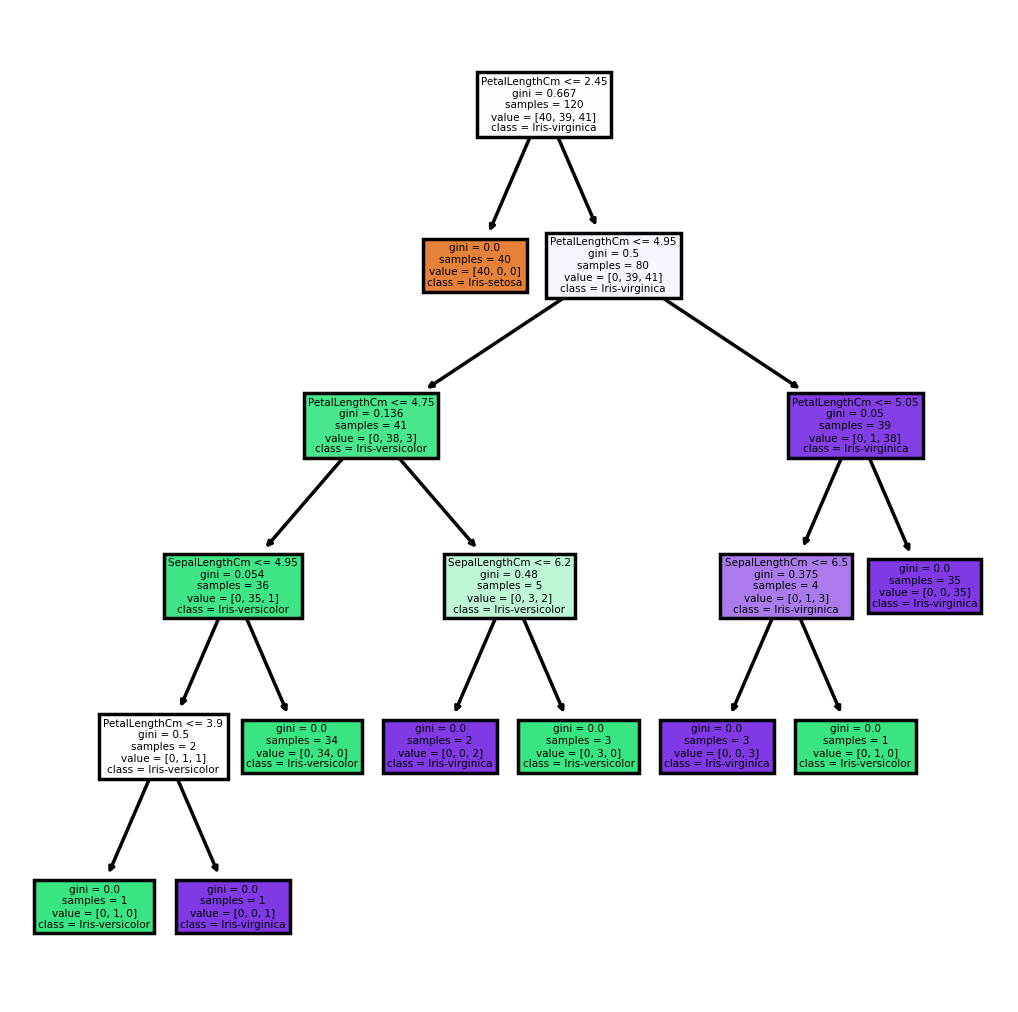

In [189]:
#This code generates and saves a visual representation of a decision tree classifier (clf) trained on the Iris dataset. The tree is plotted using the features specified in feature_names and the corresponding class names in class_names, with node colors indicating the predicted class. The resulting visualization is saved as an image file named 'IrisTreeClassifier.png'.

from sklearn import tree

feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')

tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTreeClassifier.png')